# One hidden layer 

1. implement a 2-class neural network classifier with one hidden layer
2. use units with a non-linear activation function, such as tanh
3. compute the cross entropy loss
4. implement forward and backward propagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
from planar_utils import plot_decision_boundary,sigmoid,load_planar_dataset,load_extra_datasets
%matplotlib inline
np.random.seed(1)
import warnings
warnings.filterwarnings('ignore')

## Load Data 

In [2]:
X, Y = load_planar_dataset()

In [3]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


X -- two features X[0],X[1]

Y -- 0 or 1

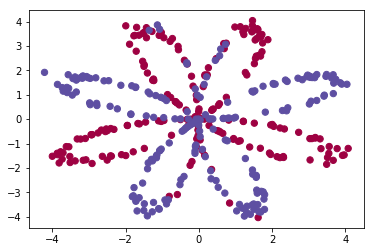

In [26]:
plt.scatter(X[0,:],X[1,:],c = Y.squeeze(), s=40,cmap=plt.cm.Spectral)

## Simple Logistic Regression

Accuracy of logistic regression : 47% (percentage of correctly labelled datapoints)


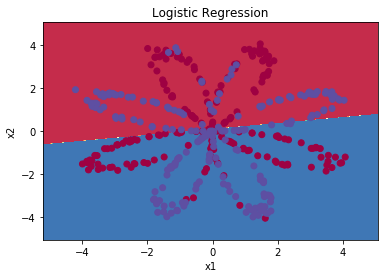

In [27]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)
plot_decision_boundary(lambda x: clf.predict(x), X, Y.squeeze())
plt.title('Logistic Regression')
LR_predictions = clf.predict(X.T)
print('Accuracy of logistic regression : %d' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100)+
       '% ' + "(percentage of correctly labelled datapoints)")

## Neural Network Model 
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

#### Building a neural net
1. Define structure: dimensions of matrices
2. Initialize 
3. Loop for many interations: (1) forward pass; (2) compute cost; (3) backward pass; (4) update

<img src="images/grad_summary.png" style="width:600px;height:300px;">

In [4]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x,n_h,n_y)

In [6]:
def initialize_parameters(n_x,n_h,n_y):
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert(W1.shape == (n_h,n_x))
    assert(b1.shape == (n_h,1))
    assert(W2.shape == (n_y,n_h))
    assert(b2.shape == (n_y,1))
    
    parameters = {'W1':W1,
                 'b1':b1,
                 'W2':W2,
                 'b2':b2}
    
    return parameters

In [22]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {'Z1' : Z1,
             'A1' : A1,
             'Z2': Z2,
             'A2': A2}
    
    return A2,cache

In [12]:
def compute_cost(A2,Y,parameters):
    
    m = Y.shape[1]
    
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),(1-Y))
    cost = -np.sum(logprobs)/m
    
    cost = np.squeeze(cost)
    
    assert(isinstance(cost,float))
    
    return cost

In [14]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / m
    dZ1 = np.dot(W2.T,dZ2) * (1- np.power(A1,2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
    
    grads = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }
    
    return grads

In [16]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {'W1':W1,
                 'b1':b1,
                 'W2':W2,
                 'b2':b2}
        
    return parameters

In [39]:
def nn_model(X, Y, n_h, number_iterations = 10000, print_cost = False):
    
    np.random.seed(3)
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)

    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0,number_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print('Cost after iteration %i : %f' % ( i, cost))
            
    return parameters

In [40]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [41]:
parameters = nn_model(X, Y, n_h = 4, number_iterations = 10000, print_cost = False)

Text(0.5, 1.0, 'Decision Boundary for hidden layer size4')

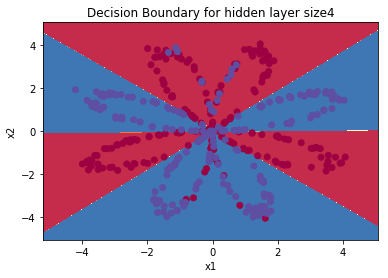

In [42]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.squeeze())
plt.title('Decision Boundary for hidden layer size' + str(4))

In [43]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


## Tuning hidden layer size 

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.25 %


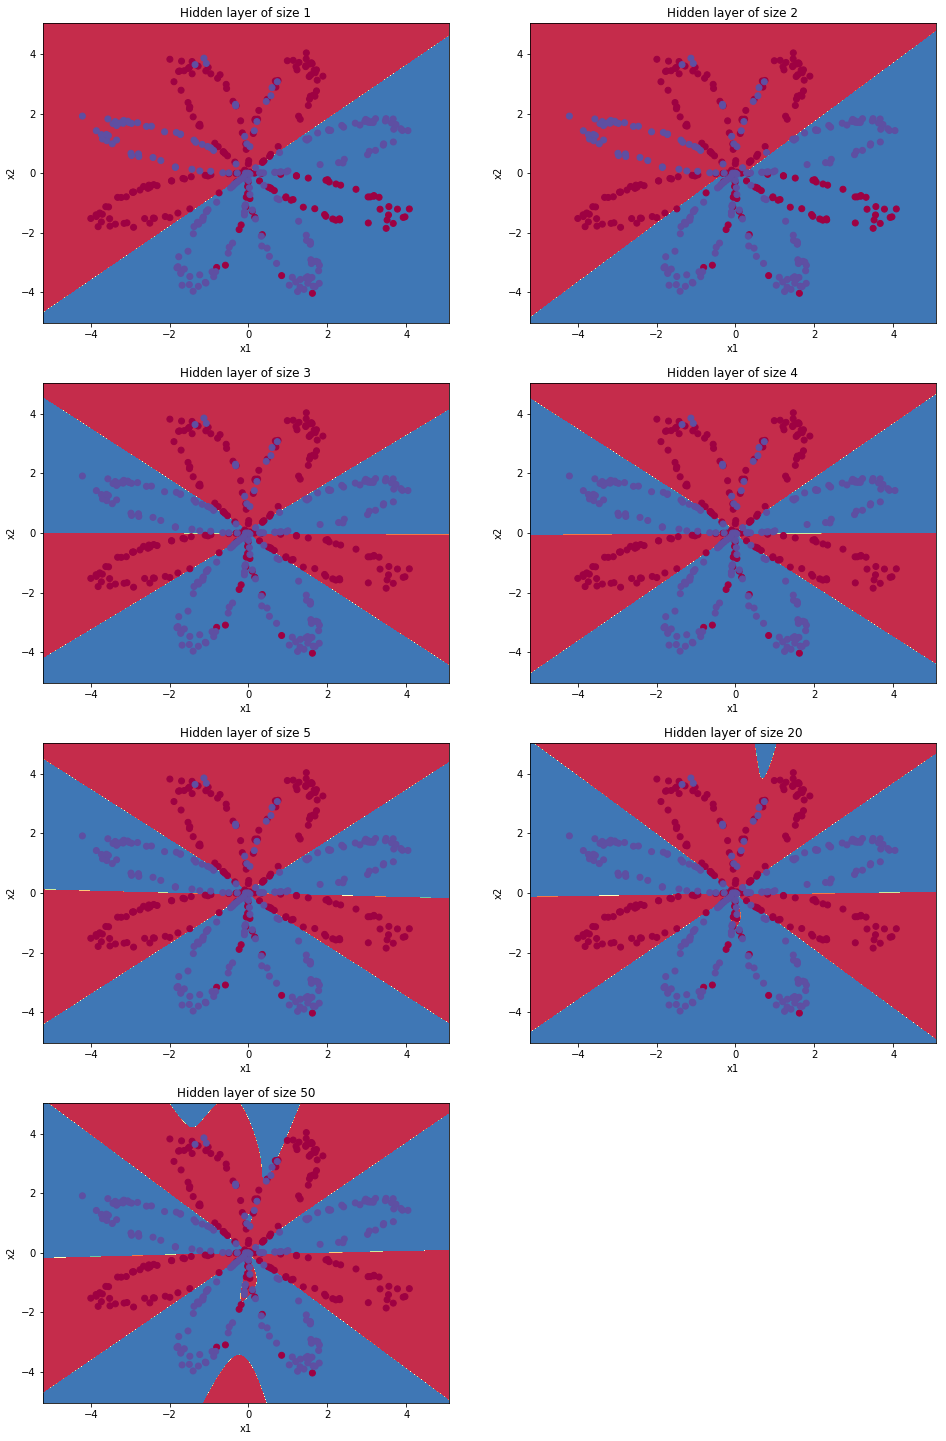

In [44]:
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1,2,3,4,5,20,50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5,2,i+1)
    plt.title('Hidden layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, number_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.squeeze())
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Some questions that you can explore if you wish:

What happens when you change the tanh activation for a sigmoid activation or a ReLU activation?

Play with the learning_rate. What happens?

What if we change the dataset? (See part 5 below!)

# Performance on other datasets

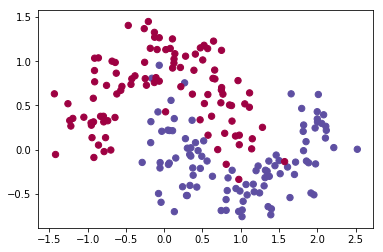

In [46]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.squeeze(), s=40, cmap=plt.cm.Spectral);

# Reference
http://scs.ryerson.ca/~aharley/neural-networks/

http://cs231n.github.io/neural-networks-case-study/